In [9]:
import torch
import requests
import matplotlib.pyplot as plt

In [ ]:
# torch seed 고정
torch.manual_seed(1)

In [38]:
def findPC(Z):
    w = torch.randn(Z.shape[1])
    w = w/(torch.dot(w,w))**0.5

    lr = 0.1

    for epoch in range(1001):
        w.requires_grad_(True)
        variance = torch.mean(torch.sum(Z * w, dim=1) ** 2)
        variance.backward()
        with torch.no_grad():
            w = w + lr * w.grad
            w = w/(torch.dot(w,w))**0.5
    return w, variance.item()

def PCA(Z, n):
    W, V = [], []
    for _ in range(n):
        w, v = findPC(Z)
        W.append(w.tolist())
        V.append(v)
        Z = Z - (Z @ w.view(-1,1)) * w
    return W, V

def transform(Z, W):
    return Z @ torch.Tensor(W).T

In [36]:
Z.shape, W[0].shape

(torch.Size([150, 4]), torch.Size([4]))

In [37]:
(Z @ W[0].view(-1,1)) * W[0]

tensor([[-9.7058e-01,  2.2083e-01, -2.2992e+00, -9.6321e-01],
        [-9.8186e-01,  2.2339e-01, -2.3259e+00, -9.7440e-01],
        [-1.0449e+00,  2.3774e-01, -2.4753e+00, -1.0370e+00],
        [-9.9308e-01,  2.2595e-01, -2.3525e+00, -9.8554e-01],
        [-9.8663e-01,  2.2448e-01, -2.3372e+00, -9.7914e-01],
        [-8.2439e-01,  1.8756e-01, -1.9529e+00, -8.1813e-01],
        [-1.0200e+00,  2.3207e-01, -2.4163e+00, -1.0123e+00],
        [-9.4971e-01,  2.1608e-01, -2.2498e+00, -9.4250e-01],
        [-1.0443e+00,  2.3759e-01, -2.4737e+00, -1.0363e+00],
        [-9.6683e-01,  2.1997e-01, -2.2903e+00, -9.5949e-01],
        [-9.0633e-01,  2.0621e-01, -2.1470e+00, -8.9945e-01],
        [-9.4489e-01,  2.1498e-01, -2.2383e+00, -9.3771e-01],
        [-1.0079e+00,  2.2932e-01, -2.3876e+00, -1.0003e+00],
        [-1.1662e+00,  2.6533e-01, -2.7626e+00, -1.1573e+00],
        [-9.5588e-01,  2.1748e-01, -2.2644e+00, -9.4862e-01],
        [-8.6198e-01,  1.9612e-01, -2.0420e+00, -8.5544e-01],
        

In [11]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

r = requests.get(iris_url)
open('iris.data','wb').write(r.content)

vectors = []
answers = []
with open('iris.data', 'r') as f:
    for line in f:
        line = line.strip()
        if len(line) != 0:
            items = line.split(",")
            vectors.append([float(x) for x in items[:4]])
            answers.append(items[4])
            
species = {a: i for i, a in enumerate(set(answers))}

In [12]:
X = torch.FloatTensor(vectors)
Z = (X-torch.mean(X, axis=0))

In [26]:
W[0].tolist()

[-0.3615897297859192,
 0.08226893842220306,
 -0.8565720319747925,
 -0.3588440418243408]

In [39]:
W, V = PCA(Z, 4)
K = transform(Z, W)

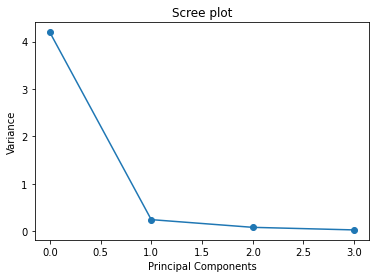

In [40]:
plt.title("Scree plot")
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.plot(range(4), V, "o-")
plt.show()

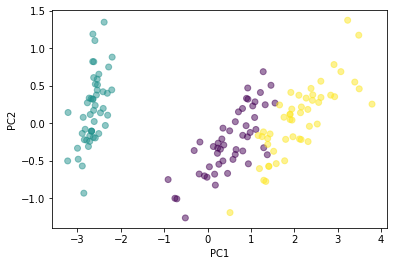

In [44]:
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(K[:,0], K[:,1], c=[species[a] for a in answers], alpha=0.5)

plt.show()

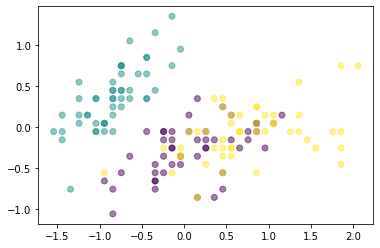

In [45]:
plt.scatter(Z[:,0], Z[:,1], c=[species[a] for a in answers], alpha=0.5)